# **공연 별, 좌석 별 정보 시각화**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

rc = {
    "axes.facecolor": "#FFFFFF",       
    "figure.facecolor": "#FFFFFF",
    "axes.edgecolor": "#000000",
    "grid.color": "#CCCCCC",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc = rc)
plt.rc('axes', unicode_minus = False)

In [2]:
reservation_df = pd.read_csv("C:/Users/whileduck/Desktop/Github/Concert-Hall-Price-Model/data/reservation_table.csv")
seat_df = pd.read_csv("C:/Users/whileduck/Desktop/Github/Concert-Hall-Price-Model/data/seat_table.csv")

In [3]:
reservation_df.head()

,전체공연시간,좌석 오픈 여부,예매여부,공연 별 평균 가격,공연 예매율,play_date,play_st_time,pre_open_date,open_date,running_time,intermission,누적검색량,연도,월,연 월,일,시간,요일
0,2018-11-25 17:00:00,2505,1537,1640.858816,0.613573,2018-11-25,17:00:00,2018-10-28,2018-10-29,120,15,1000,2018,11,2018-11-01,25,17,6
1,2018-12-08 17:00:00,2505,2159,1182.028717,0.861876,2018-12-08,17:00:00,NaN,2018-10-29,140,20,980,2018,12,2018-12-01,8,17,5
2,2019-01-11 20:00:00,2505,1425,44413.333333,0.568862,2019-01-11,20:00:00,2018-12-10,2018-12-10,105,15,1180,2019,1,2019-01-01,11,20,4
3,2019-02-05 20:00:00,2505,2149,938.110749,0.857884,2019-02-05,20:00:00,NaN,2018-12-22,120,20,1020,2019,2,2019-02-01,5,20,1
4,2019-02-16 17:00:00,2505,1166,6556.603774,0.465469,2019-02-16,17:00:00,NaN,2018-12-30,130,20,1220,2019,2,2019-02-01,16,17,5


# **공연 예매율과 관련된 EDA**

# **공연일에 따른 공연 예매율 변화**

Text(0.5, 1.0, '연도 별 공연 예매율 변화')

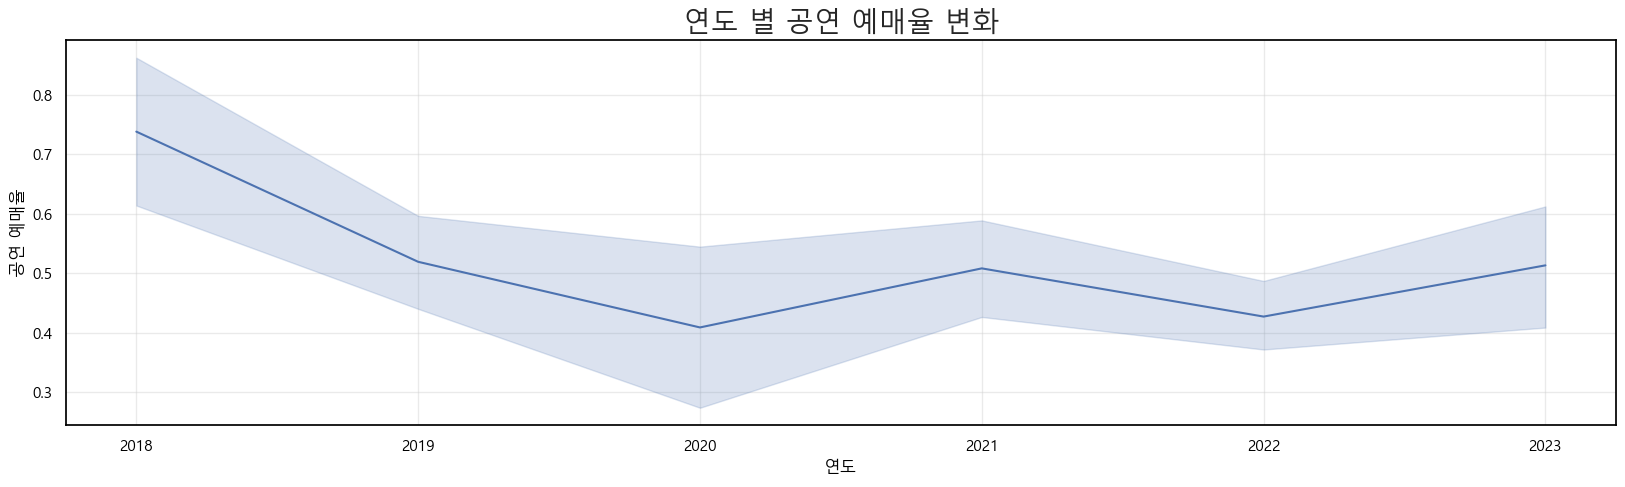

In [4]:
fig,ax = plt.subplots(figsize = (20,5))

sns.lineplot(
    data = reservation_df,
    x = '연도',
    y = '공연 예매율',
    ax = ax
)

ax.set_title('연도 별 공연 예매율 변화', fontsize = 20)

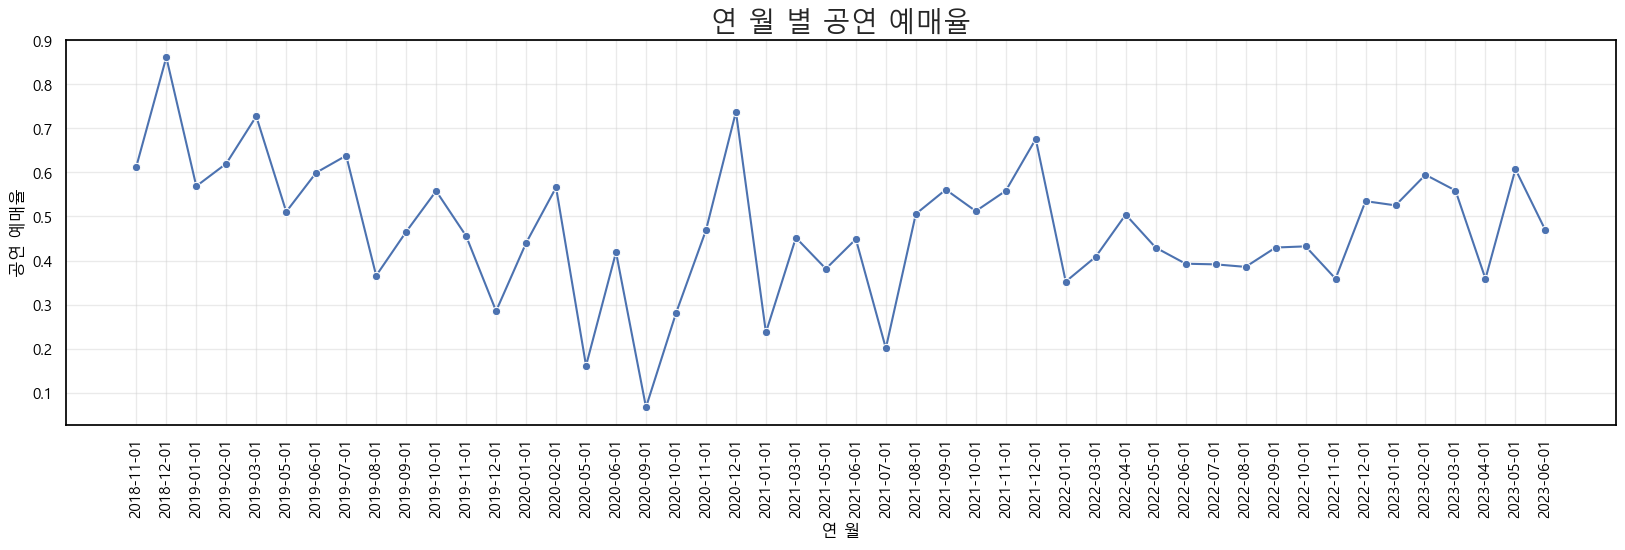

In [5]:
fig,ax = plt.subplots(figsize = (20,5))

sns.lineplot(
    data = reservation_df,
    x = '연 월',
    y = '공연 예매율',
    errorbar = None,
    marker = 'o',
    ax = ax
)

ax.set_title('연 월 별 공연 예매율', fontsize = 20)
xticks_values = reservation_df['연 월'].unique()  
ax.set_xticks(range(len(xticks_values)))  
ax.set_xticklabels(xticks_values, rotation = 90);

Text(0.5, 1.0, '월 별 공연 예매율')

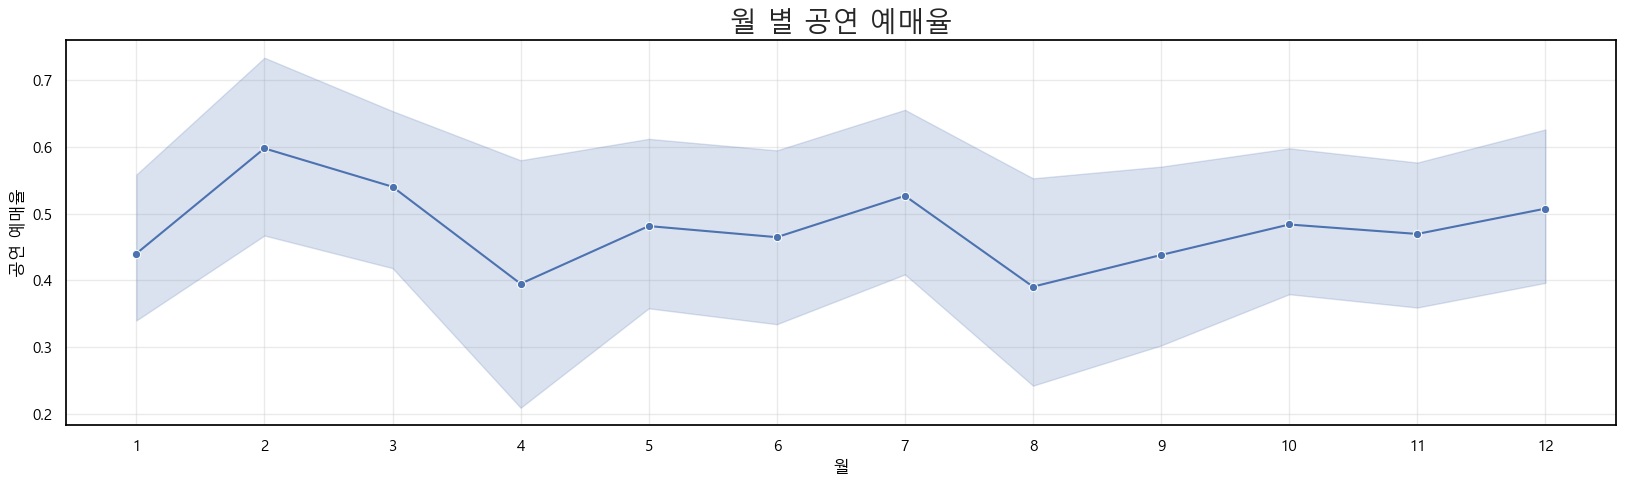

In [6]:
fig,ax = plt.subplots(figsize = (20,5))

sns.lineplot(
    data = reservation_df,
    x = '월',
    y = '공연 예매율',
    marker = 'o',
    ax = ax
)

xticks = range(1,12 + 1)
ax.set_xticks(xticks)

ax.set_title('월 별 공연 예매율', fontsize = 20)

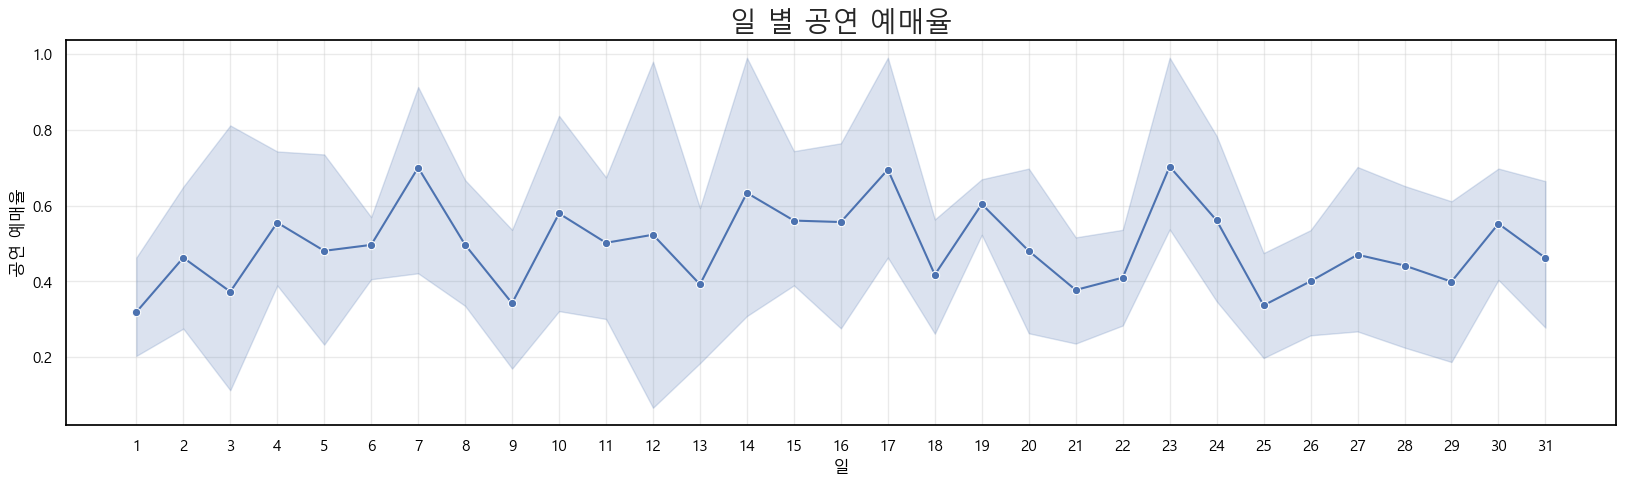

In [7]:
fig,ax = plt.subplots(figsize = (20,5))

sns.lineplot(
    data = reservation_df,
    x = '일',
    y = '공연 예매율',
    marker = 'o',
    ax = ax
)

ax.set_title('일 별 공연 예매율', fontsize = 20)
xticks = range(1, 31 + 1)
ax.set_xticks(xticks);

# **요일 따른 공연 예매율 변화**

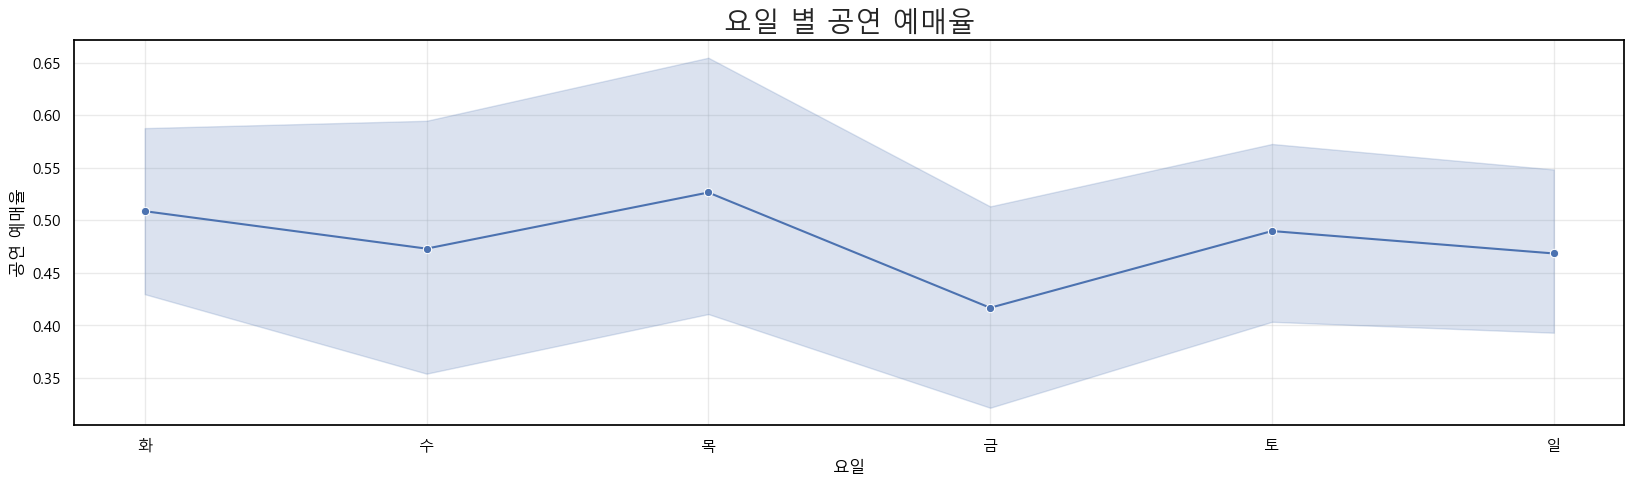

In [8]:
fig,ax = plt.subplots(figsize = (20,5))

sns.lineplot(
    data = reservation_df,
    x = '요일',
    y = '공연 예매율',
    marker = 'o',
    ax = ax
)

ax.set_title('요일 별 공연 예매율', fontsize = 20)
ax.set_xticks(range(1,7))
ax.set_xticklabels(labels=['화', '수', '목', '금', '토','일']); # 매주 월요일은 정기 휴관

# **상관 관계와 관련된 EDA**

# **공연 별 평균 가격과 예매 여부**

Text(0.5, 1.0, '공연 별 가격과 예매율의 회귀 분석 그래프 \n 상관계수 : -0.46')

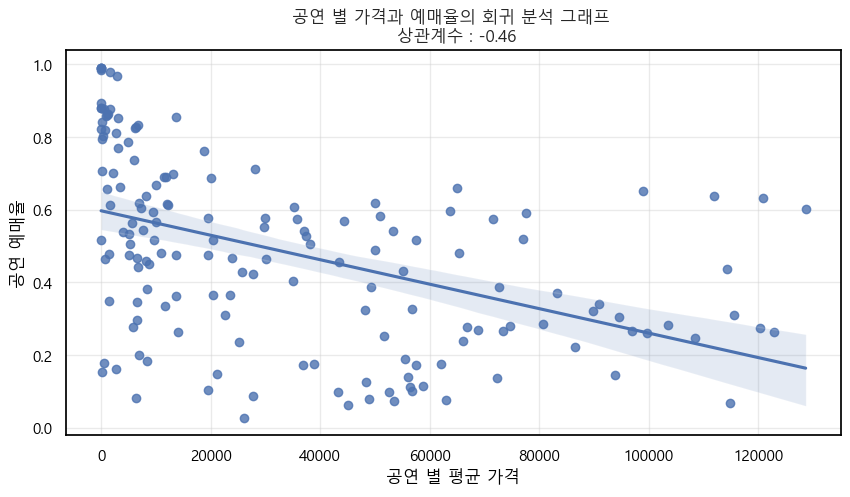

In [9]:
fig,ax = plt.subplots(figsize = (10,5))

corr = round(reservation_df[['공연 별 평균 가격','공연 예매율']].corr().iloc[0,1],2)

sns.regplot(
    data = reservation_df,
    x = '공연 별 평균 가격',
    y = '공연 예매율',
    ax = ax
)

ax.set_title(f'공연 별 가격과 예매율의 회귀 분석 그래프 \n 상관계수 : {corr}')


# **러닝타임, 인터미션과 예매 여부**

Text(0.5, 1.0, '인터미션과 예매율의 회귀 분석 그래프 \n corr : 0.16')

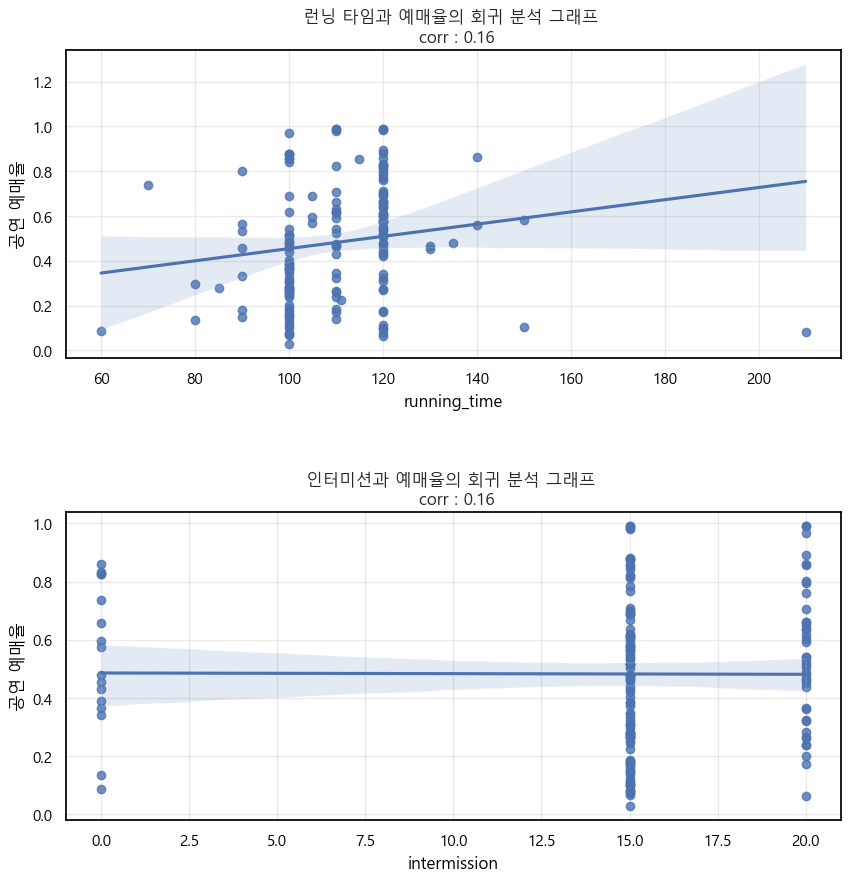

In [10]:
fig,ax = plt.subplots(figsize = (10,10), nrows = 2)

fig.subplots_adjust(hspace = 0.5)

running_corr = round(reservation_df[['running_time','공연 예매율']].corr().iloc[0,1],2)

sns.regplot(
    data = reservation_df,
    x = 'running_time',
    y = '공연 예매율',
    ax = ax[0]
)

ax[0].set_title(f'런닝 타임과 예매율의 회귀 분석 그래프 \n corr : {running_corr}')

intermission_corr = round(reservation_df[['intermission','공연 예매율']].corr().iloc[0,1],2)


sns.regplot(
    data = reservation_df,
    x = 'intermission',
    y = '공연 예매율',
    ax = ax[1]
)

ax[1].set_title(f'인터미션과 예매율의 회귀 분석 그래프 \n corr : {running_corr}')


# **누적 검색량과 예매율의 산점도**

Text(0.5, 1.0, '누적검색량과 공연예매율의 회귀분석 그래프 \n 상관관계 : 0.03')

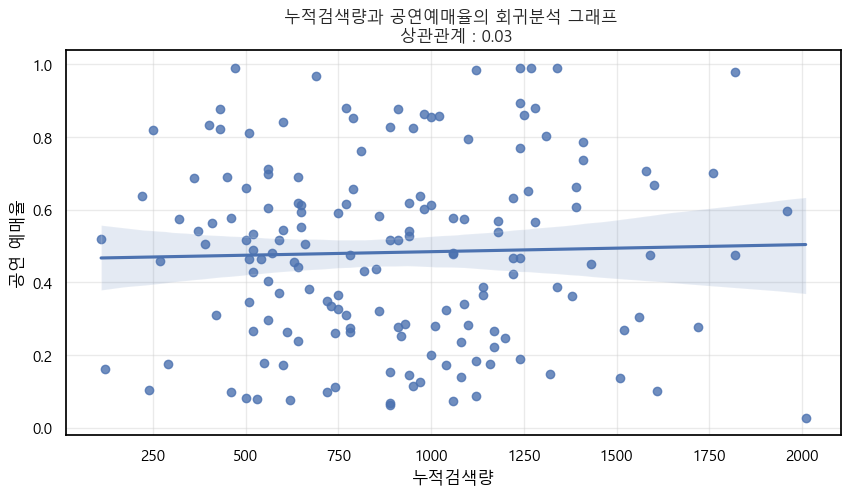

In [11]:
fig,ax = plt.subplots(figsize = (10,5))

search_corr  = round(reservation_df[['누적검색량','공연 예매율']].corr().iloc[0,1], 2)

sns.regplot(
    data = reservation_df,
    x = '누적검색량',
    y = '공연 예매율'
)

ax.set_title(f'누적검색량과 공연예매율의 회귀분석 그래프 \n 상관관계 : {search_corr}')

<AxesSubplot:>

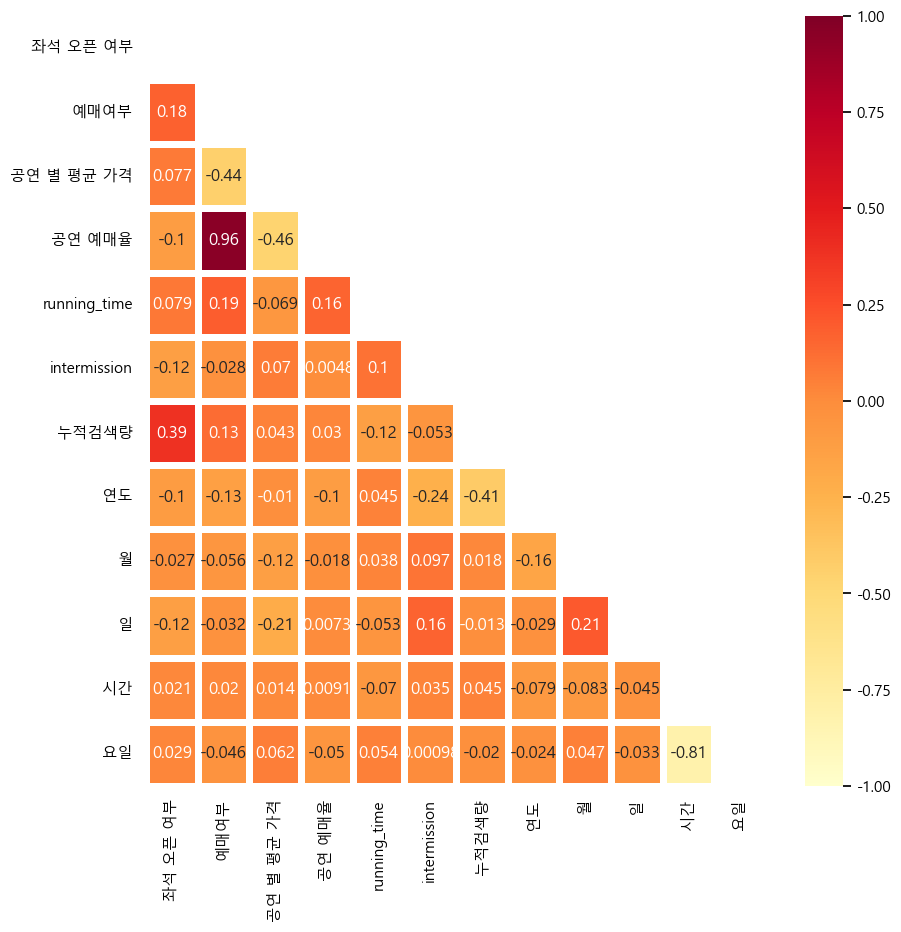

In [12]:
num_cols = reservation_df.describe().columns 

corr = reservation_df[num_cols].corr()

mask = np.triu(np.ones_like(corr))

fig,ax = plt.subplots(figsize = (10,10))

sns.heatmap(corr, mask = mask, annot = True, linewidths = 5, vmin = -1, vmax = 1, cmap = 'YlOrRd')

# **좌석 정보와 관련된 EDA**

In [13]:
seat_df.head()

,seat,예매여부,좌석 오픈 여부,좌석 별 평균 가격,거래까지걸린시간_시간,거래까지걸린시간_등수,좌석 예매율,층,블록,열,넘버,X,Y,Z,대칭점,무대_밑_좌우시야각,무대_위_좌우시야각,무대가_보이는_면적
0,1층 A블록10열 1,70,153,20057.142857,828.698095,1105.378910,0.457516,1층,A블록,10,1,1747,1347,69,1층 E블록10열 11,17,30,1798
1,1층 A블록10열 10,96,155,26770.833333,693.585069,810.635850,0.619355,1층,A블록,10,10,1296,1463,69,1층 E블록10열 2,20,43,1945
2,1층 A블록10열 11,84,143,28119.047619,730.825595,793.470474,0.587413,1층,A블록,10,11,1246,1473,69,1층 E블록10열 1,20,44,1972
3,1층 A블록10열 2,77,152,21025.974026,765.852814,1006.822059,0.506579,1층,A블록,10,2,1698,1361,69,1층 E블록10열 10,17,31,1808
4,1층 A블록10열 3,73,144,19520.547945,788.947945,956.426186,0.506944,1층,A블록,10,3,1649,1375,69,1층 E블록10열 9,18,33,1818


In [14]:
def seat_scatter(data, col,reverse = False, devide = 5, cmap = 'YlOrRd'):
    
    # cbar 만들기 
    vmin = data[col].min()
    vmax = data[col].max()
    
    norm = mcolors.Normalize(vmin = vmin , vmax = vmax)
    
    if not reverse:
        cmap = plt.get_cmap(cmap, devide)
    else:
        cmap = plt.get_cmap(cmap + '_r', devide)
    
    colors = cmap(norm(data[col])) # scatterplot color 만들기 
    cbar = ScalarMappable(cmap = cmap , norm = norm)
    
    fig,ax = plt.subplots(subplot_kw = {'projection':'3d'}, figsize = (30,10))
    
    ax.set_box_aspect([3,3,1]) # 예술의 전당 사이즈로 변경 
    
    ax.scatter(
        data = data,
        xs = 'X',
        ys = 'Y',
        zs = 'Z',
        c = colors 
    )
    
    cbar = fig.colorbar(cbar , shrink = 0.5) # color bar 형태로 변경 
    cbar.set_label(col)
    
    ax.set_title(f'{col}에 따른 3차원 산점도',fontsize = 20)

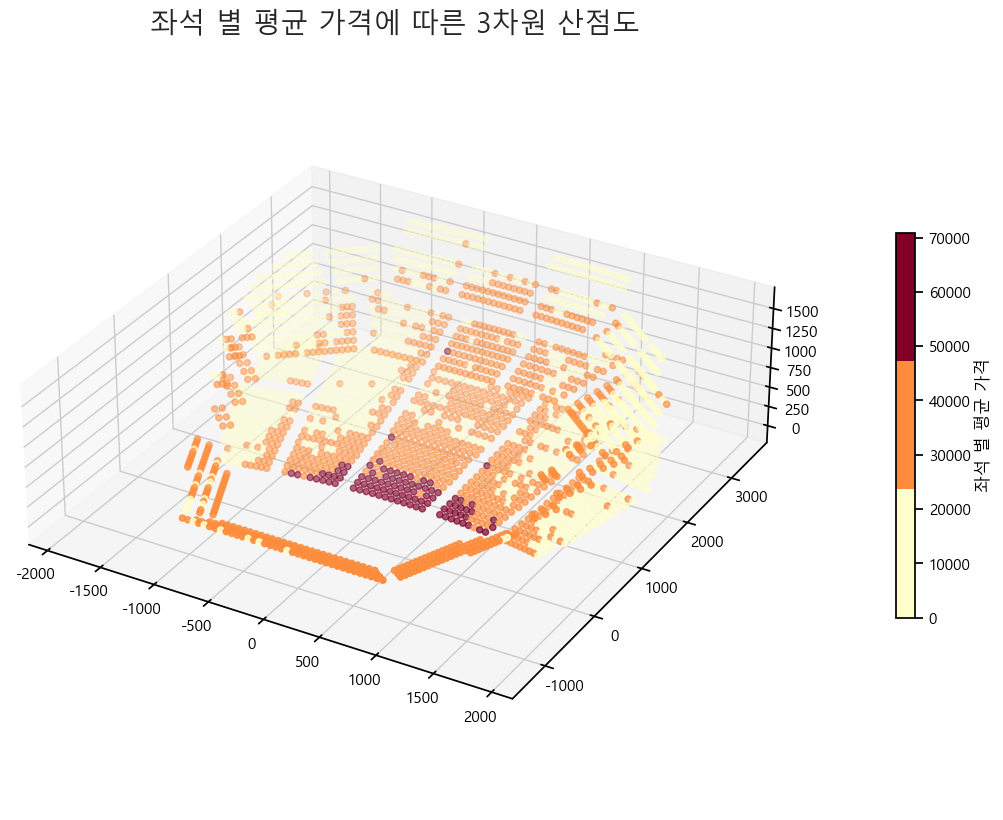

In [15]:
seat_scatter(seat_df, '좌석 별 평균 가격', devide = 3)

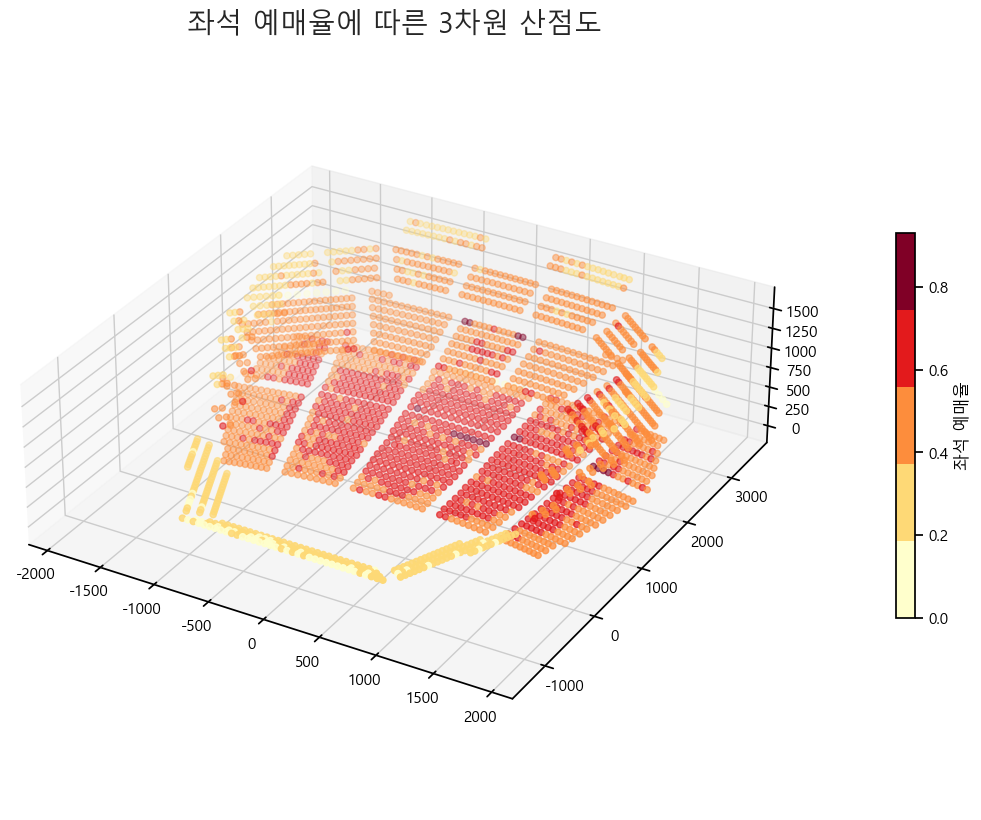

In [16]:
seat_scatter(seat_df, '좌석 예매율', devide = 5)

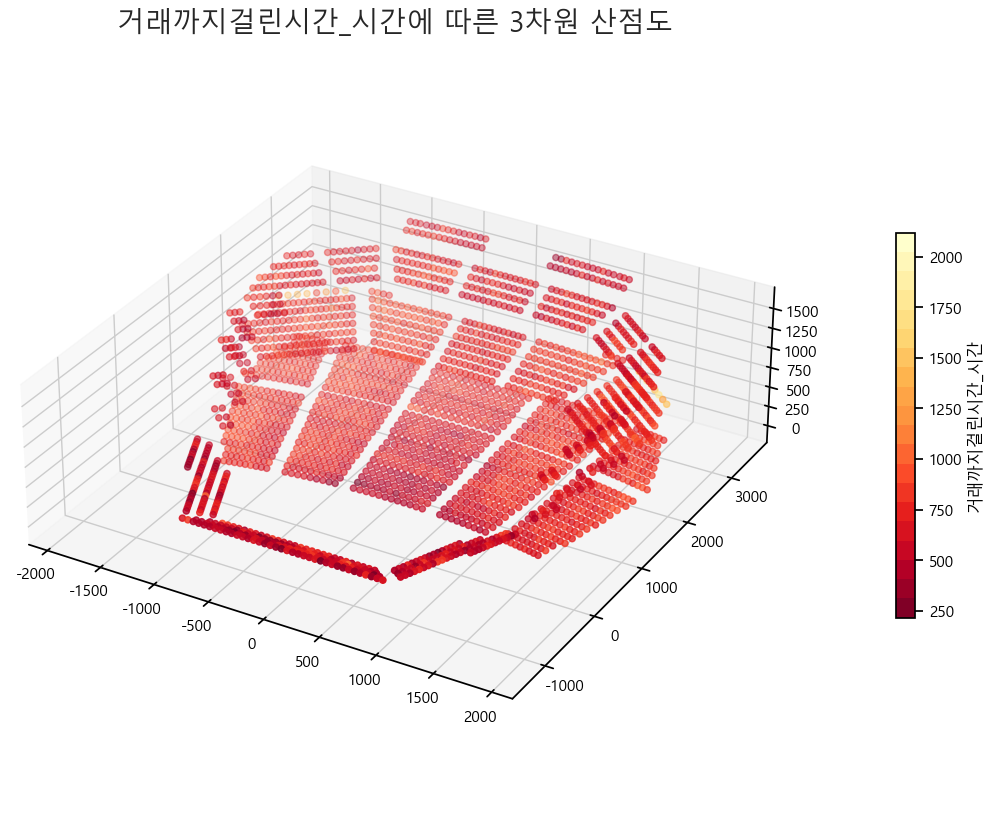

In [17]:
seat_scatter(seat_df, '거래까지걸린시간_시간',reverse = True, devide = 20)

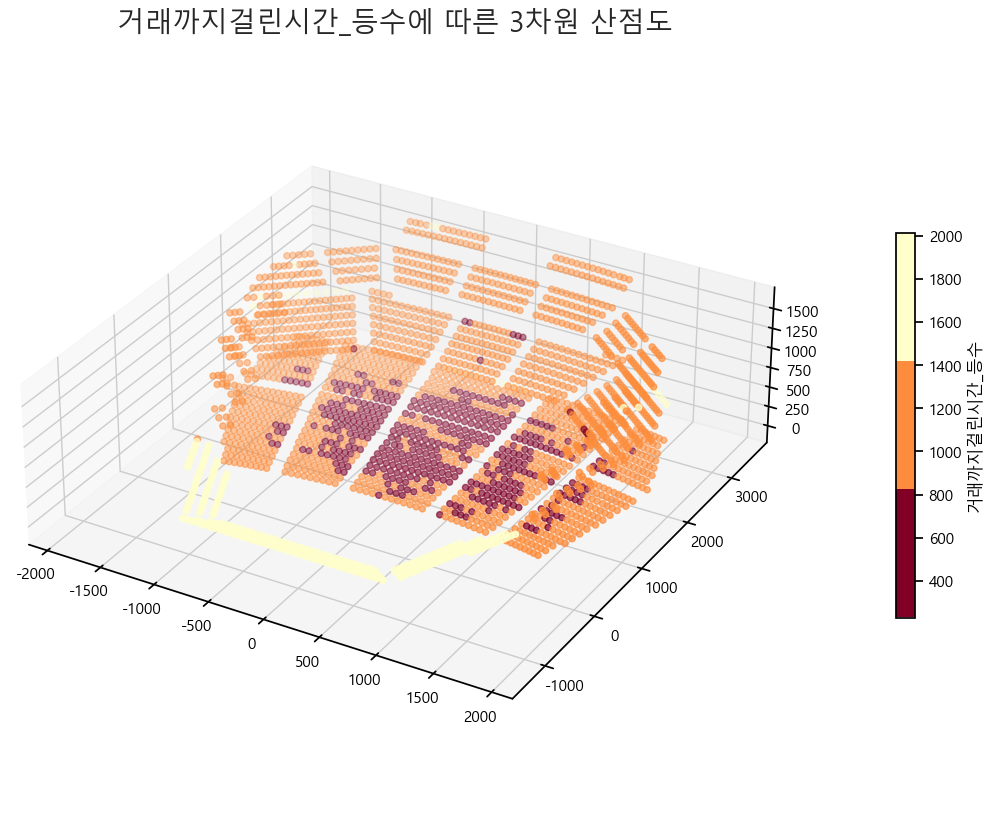

In [19]:
seat_scatter(seat_df, '거래까지걸린시간_등수',reverse = True, devide = 3)